In [ ]:
import torch
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

# Policy Iteration

In [ ]:
# Setup
size = 5
states = size * size
actions = 4
num_rewards = 2
gamma = 0.9
goal = states - 1

possible_rewards = torch.tensor([0.0, 1.0])

# Joint distribution: p(s', r | s, a)
transition_probabilities = torch.zeros(states, actions, states, num_rewards)
v = torch.zeros(states)


In [ ]:
for s in range(states):
    row, col = s // size, s % size

    # up, down, left, right
    moves = [
        (max(0, row - 1), col),
        (min(size - 1, row + 1), col),
        (row, max(0, col - 1)),
        (row, min(size - 1, col + 1))
    ]

    for a, (new_row, new_col) in enumerate(moves):
        s_prime = new_row * size + new_col

        if s_prime == goal:
            transition_probabilities[s, a, s_prime, 1] = 1.0  # reward 1
        else:
            transition_probabilities[s, a, s_prime, 0] = 1.0  # reward 0

# Policy
policy = torch.ones(states, actions) / actions


In [ ]:
def action_value(s, a):
  q_ = 0.0
  for s_prime in range(states):
    for r_idx in range(num_rewards):
        prob_ = transition_probabilities[s, a, s_prime, r_idx]
        reward_ = possible_rewards[r_idx]
        value_function_ = v[s_prime]
        q_ += prob_ * (reward_ + gamma *value_function_ )
  return q_

def state_value(s):
    v_ = 0.0
    action_values = torch.zeros(actions)
    for a in range(actions):
        policy_prob = policy[s, a]
        action_v = action_value(s, a)
        action_values[a] = action_v
        v_ += policy_prob * action_v
    return v_, action_values

## one evaluation-improvement pass

In [ ]:
# Policy evaluation
theta = 0.00001
v = torch.zeros(states)
q = torch.zeros(states, actions)

In [ ]:

def policy_evaluation(v, q, theta=0.00001):
    while True:
        delta = 0.0
        for s in range(states):
            v_old = v[s]
            state_value_, action_values_ = state_value(s)
            v[s] = state_value_
            q[s] = action_values_
            delta = max(delta, abs(v_old - v[s]))
        if delta < theta:
            break
    return v, q


def policy_improvement(v):
    new_policy = torch.zeros_like(policy)
    for s in range(states):
        _, action_values = state_value(s)
        best_a = torch.argmax(action_values)
        new_policy[s] = torch.nn.functional.one_hot(best_a, actions).float()
    return new_policy

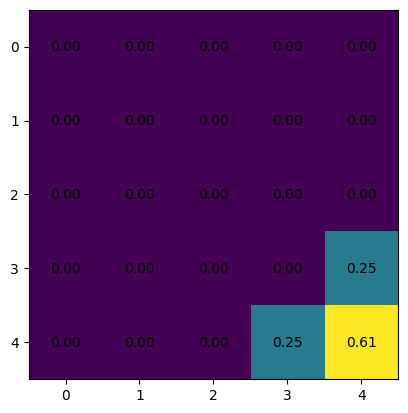

In [ ]:
v,q = policy_evaluation(v,q)
# last_action_values = q[-1]
# sum([av* policy[states-1,n] for n,av in enumerate(last_action_values)])
plt.imshow(v.view(5,5))
for i in range(5):
    for j in range(5):
        plt.text(j, i, f"{v[i*5+j]:.2f}", ha="center", va="center", color="black")

In [ ]:
state = -1
for a in range(actions):
  av = action_value(state,a)
  # print(policy[state,a])
  # print(av)
  print(av*policy[state, a])

# this is the value we expect in the next iteration, because to calculate it we are using the new action values

tensor(0.0562)
tensor(0.3878)
tensor(0.0562)
tensor(0.3878)


In [ ]:
policy = policy_improvement(v)

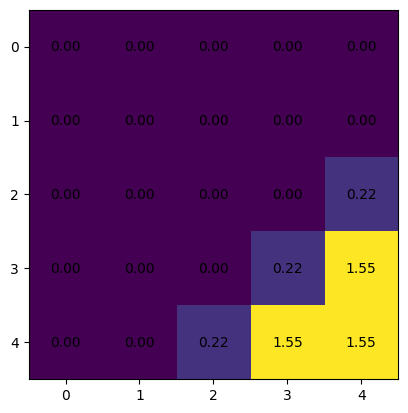

In [ ]:
v,q = policy_evaluation(v,q)
# last_action_values = q[-1]
# sum([av* policy[states-1,n] for n,av in enumerate(last_action_values)])
plt.imshow(v.view(5,5))
for i in range(5):
    for j in range(5):
        plt.text(j, i, f"{v[i*5+j]:.2f}", ha="center", va="center", color="black")

## all together

In [ ]:

while True:
    v, q = policy_evaluation(v, q)
    new_policy = policy_improvement(v)
    if torch.all(new_policy == policy):
        break
    else:
      policy= new_policy



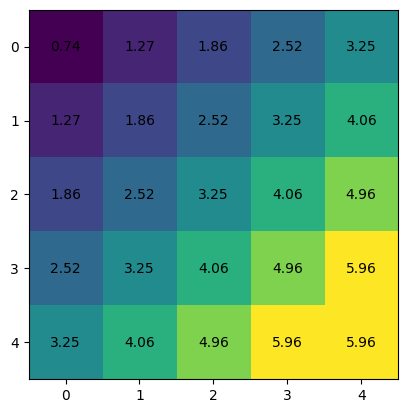

In [ ]:
# last_action_values = q[-1]
# sum([av* policy[states-1,n] for n,av in enumerate(last_action_values)])
plt.imshow(v.view(5,5))
for i in range(5):
    for j in range(5):
        plt.text(j, i, f"{v[i*5+j]:.2f}", ha="center", va="center", color="black")


In [ ]:
v

tensor([0.7420, 1.2734, 1.8639, 2.5200, 3.2490, 1.2734, 1.8639, 2.5200, 3.2490,
        4.0590, 1.8639, 2.5200, 3.2490, 4.0590, 4.9590, 2.5200, 3.2490, 4.0590,
        4.9590, 5.9590, 3.2490, 4.0590, 4.9590, 5.9590, 5.9590])

# Value Iteration

In [ ]:
def policy_evaluation(v, q, theta=0.00001):
    for s in range(states):
        action_values_ =[]
        for a in range(actions):
          action_values_.append(action_value(s,a))
        v[s] = max(action_values_)
    return v

def policy_improvement():
    new_policy = torch.zeros_like(policy)
    for s in range(states):
        action_values = [action_value(s, a) for a in range(actions)]
        # here we can calculate the action values directly, we do not need to calculate all state values

        best_a = torch.argmax(torch.tensor(action_values))
        new_policy[s] = torch.nn.functional.one_hot(best_a, actions).float()
    return new_policy

In [ ]:
while True:
    v = policy_evaluation(v, q)
    new_policy = policy_improvement()
    if torch.all(new_policy == policy):
        break
    else:
      policy= new_policy


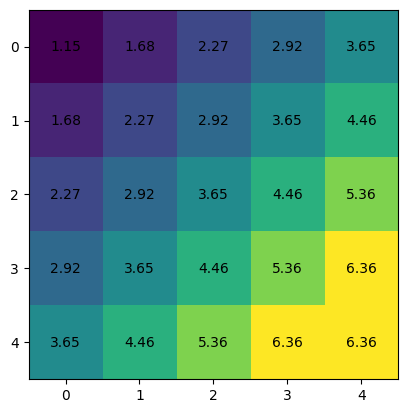

In [ ]:
plt.imshow(v.view(5,5))
for i in range(5):
    for j in range(5):
        plt.text(j, i, f"{v[i*5+j]:.2f}", ha="center", va="center", color="black")
